Testing some 2D slices of 3D plots

In [1]:
include("src/QuadIFS.jl")
using .QuadIFS, Plots;

Create IFS, as an array of similarities:

In [2]:
ρ = 0.41
IFS = [
    Similarity(ρ,[0,0])
    Similarity(ρ,[1-ρ,0])
    Similarity(ρ,[(1-ρ)/2,sqrt(3)*(1-ρ)/2])
    Similarity(ρ,[(1-ρ)/2,(1-ρ)/(2*sqrt(3))])
]
Γ = Attractor(IFS)

Attractor(Similarity[Similarity(0.41, [0, 0], [1.0 0.0; 0.0 1.0]), Similarity(0.41, [0.5900000000000001, 0.0], [1.0 0.0; 0.0 1.0]), Similarity(0.41, [0.29500000000000004, 0.5109549882328188], [1.0 0.0; 0.0 1.0]), Similarity(0.41, [0.29500000000000004, 0.17031832941093963], [1.0 0.0; 0.0 1.0])], 2, 1.5548421773629288, true, [0.5000000000000003, 0.28867513459481303], 1.0, 1.0)

Set up the problem: 
$$S\phi = f \quad\text{on } \Gamma,$$ with wavenumber $k$, incident field $d$.

In [ ]:
X = sketch_attractor(Γ);
scatter(X[1,:],X[2,:],legend=:false,markerstrokewidth=0, markersize=0.1, markercolor="black")

In [3]:
k = 53
d = [0 0 -1]
S = SingleLayer(Γ, k)
Sh = DiscreteBIO(S,0.05,0.01)
f(x) = exp(im*k*(d[1:2]'*x))
ϕ = Sh\f;

Constructing BEM system 100%|███████████████████████████| Time: 0:00:19


Now plot the solution in some slice of the domain:

In [6]:
h=0.01 # adujust this for more acurate / faster plots
z_val = -0.5
x_1 = [j for j=-.5:h:1.5]
x_2 = [j for j=-.5:h:1.5]
X_1 = repeat(x_1, outer=(1,length(x_2)))
X_2 = copy(transpose(repeat(x_2, outer=(1,length(x_1)))))
N = length(x_1)*length(x_2)
X = [reshape(X_1, (N,)) reshape(X_2, (N,)) z_val*ones(Float64,N)]
uˢ = - single_layer_potential(Γ,k,ϕ,X)
uⁱ(x) = exp.(im*k*(x*d'))[:] # define inc field in domain
uᵗ = uⁱ(X) - uˢ
vals = reshape(uᵗ,(length(x_1),length(x_2)));

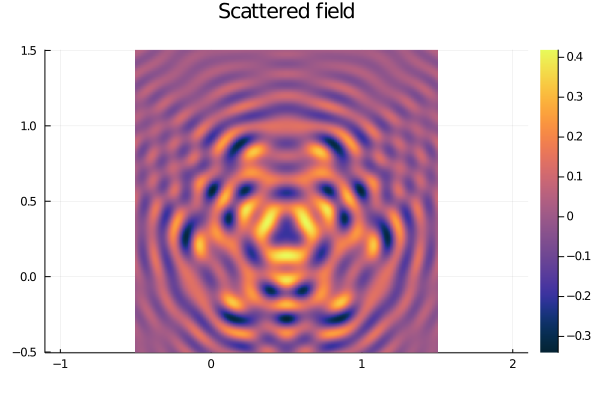

In [7]:
heatmap(x_1,x_2,transpose(real(uˢ)),  aspect_ratio = 1, 
    title="Scattered field", legend=true, c = :thermal)

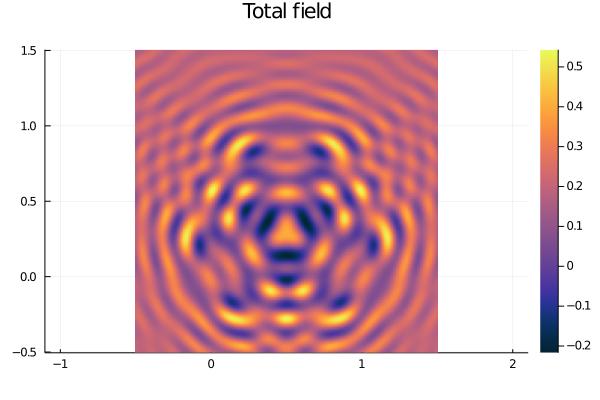

In [8]:
heatmap(x_1,x_2,transpose(real(vals)),  aspect_ratio = 1, 
    title="Total field", legend=true, c = :thermal)